In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Train and Test Data

In [2]:
train = pd.read_csv('/Users/Mitch/Documents/DATA SCIENCE/Self Learning Not School/KaggleData/Housing/train.csv')

In [3]:
test = pd.read_csv('/Users/Mitch/Documents/DATA SCIENCE/Self Learning Not School/KaggleData/Housing/test.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Fix some of the obvious variable types

In [8]:
train['YrSold'] = train['YrSold'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')

# EDA

In [9]:
# Target variable counts EDA
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

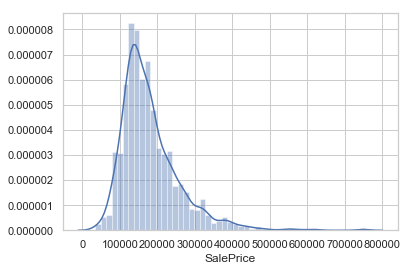

In [10]:
# Target variabe distribution EDA
sns.distplot(train.SalePrice)

### Looks skewed and kurtosis looks off

In [11]:
print("Skewness: %f" % train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Check scatterplots against target variable

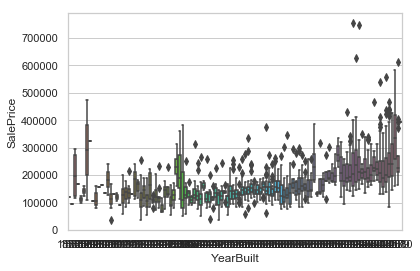

In [12]:
# Year Built
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
sns.boxplot(x=var, y='SalePrice', data = data)

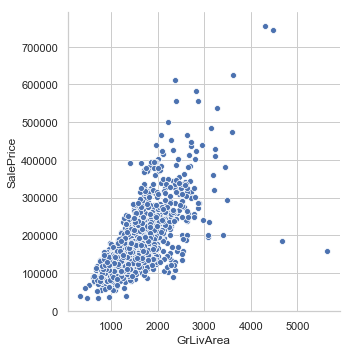

In [13]:
# Square Footabe above Ground
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
sns.relplot(x=var, y='SalePrice', data = data)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000), type = ) # Instead of SNS

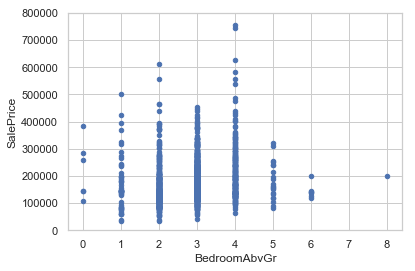

In [14]:
# Numb of Bedrooms
var = 'BedroomAbvGr'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
#sns.relplot(x=var, y='SalePrice', data = data)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000)) # Instead of SNS

(-0.5, 9.5, 0, 800000)

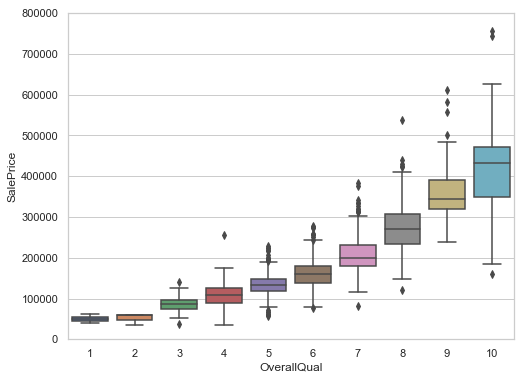

In [15]:
# Overall Quality
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

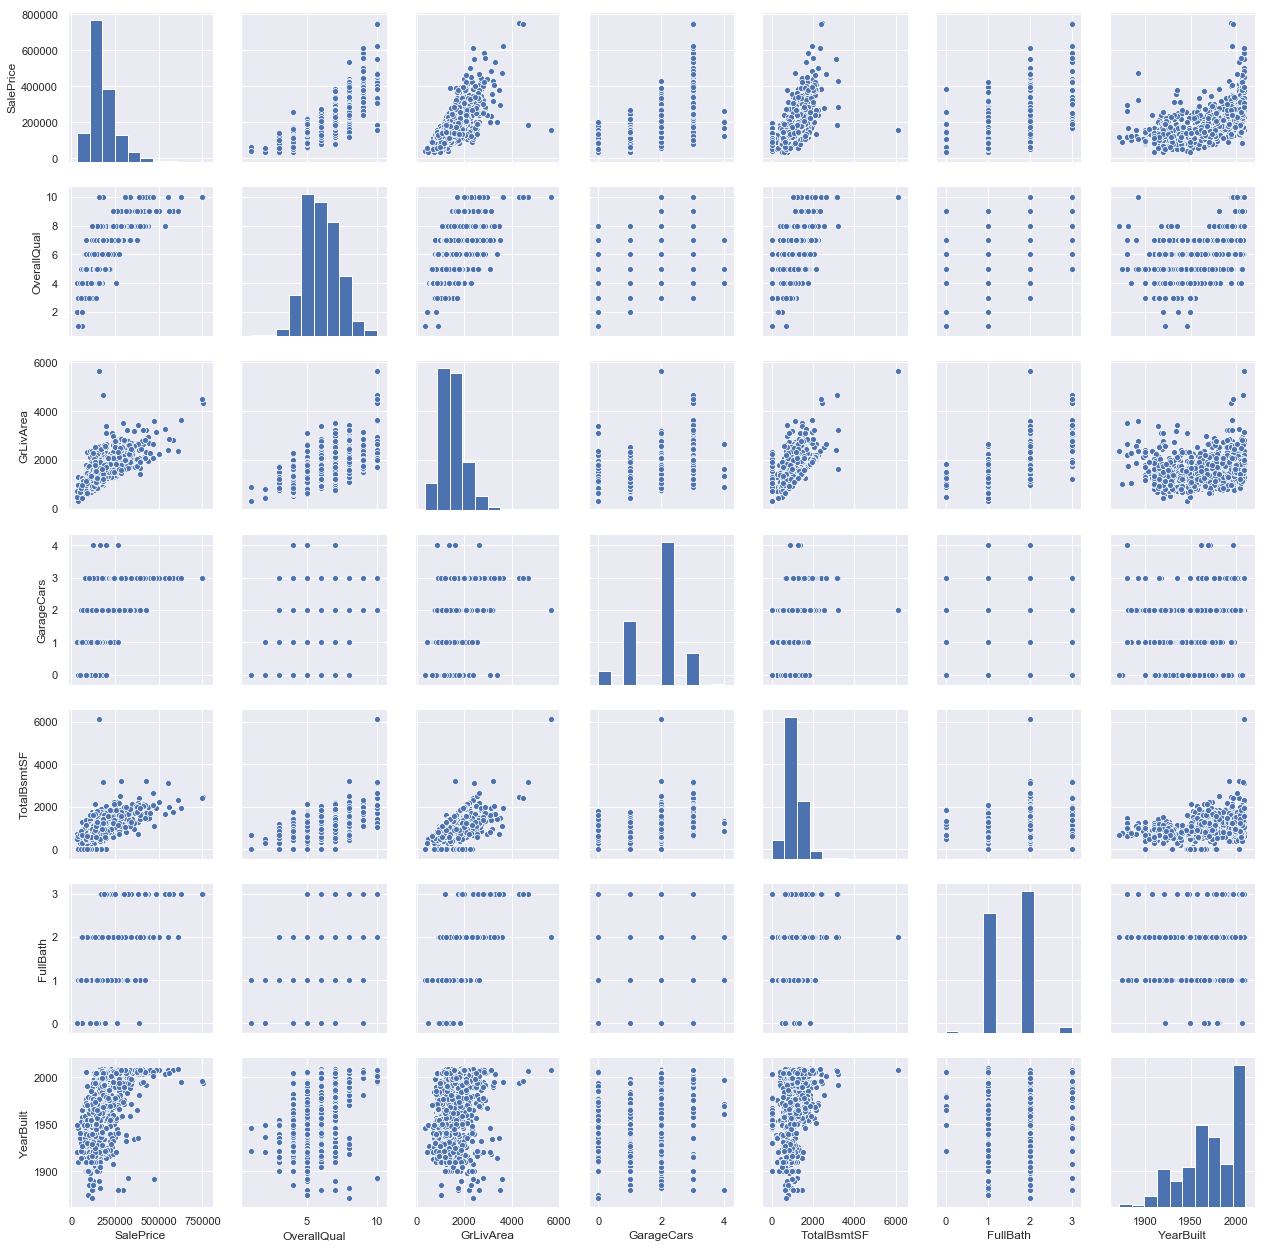

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

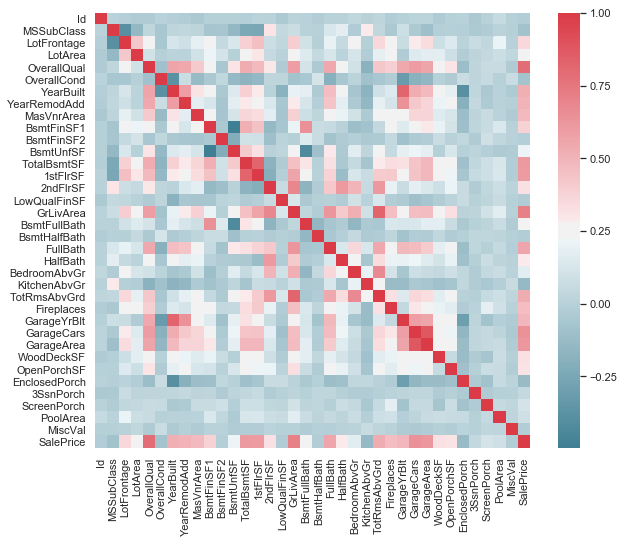

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [18]:
# All correlations to Sale Price
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCon

### Missing Values Treatment

In [19]:
print(train.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

### None of our variables are missing

# Training / Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
train_dropped = train[cols]
train_dropped = train_dropped.drop('SalePrice', axis = 1).values
y = train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(train_dropped, y, test_size = 0.3, random_state=21)
X_train.shape

(1022, 6)

## Linear Model - Less Predictors


In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as MSE

In [23]:
lm = linear_model.LinearRegression()
# Fit the regressor to the training data
lm.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = lm.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(lm.score(X_test, y_test)))
rmse = np.sqrt(MSE(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6202822447234577
Root Mean Squared Error: 48641.35367512615


## Decision Tree - Less Predictors

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
dt = DecisionTreeRegressor(max_depth=4,
                            min_samples_leaf=0.1, # Each leaf must contain AT LEAST 10% of the training data
                            random_state=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("R^2: {}".format(dt.score(X_test, y_test)))
mse_dt = MSE(y_test, y_pred) # Compute test MSE
rmse_dt = mse_dt **(1/2) # Compute test RMSE
print(rmse_dt)

R^2: 0.6653335730630899
45664.76991802249


## Random Forrest - Less Predictors

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
rf_preds = forest_model.predict(X_test)
print("R^2: {}".format(forest_model.score(X_test, y_test)))
mse_rf = MSE(y_test, rf_preds) # Compute test MSE
rmse_rf = mse_rf **(1/2) # Compute test RMSE
print(rmse_rf)

R^2: 0.7127856713699936
42303.69004598767


## Random Forrest - More Predictors

In [27]:
cols = ['SalePrice', 
        'OverallQual',
        'GrLivArea',
        'GarageCars',
        'GarageArea',
        'TotalBsmtSF',
        '1stFlrSF',
        'FullBath',
        'TotRmsAbvGrd',
        'YearBuilt',
        'YearRemodAdd',
        'Fireplaces',
        'BsmtFinSF1',
        'WoodDeckSF',
        '2ndFlrSF',
        'OpenPorchSF',
        'HalfBath',
        'LotArea',
        'BsmtFullBath']
train_dropped = train[cols]
train_dropped = train_dropped.drop('SalePrice', axis = 1).values
y = train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(train_dropped, y, test_size = 0.3, random_state=21)
X_train.shape

(1022, 18)

In [28]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
rf_preds = forest_model.predict(X_test)
print("R^2: {}".format(forest_model.score(X_test, y_test)))
mse_rf = MSE(y_test, rf_preds) # Compute test MSE
rmse_rf = mse_rf **(1/2) # Compute test RMSE
print(rmse_rf)

R^2: 0.7577192220592173
38853.90554298054


# Let's run the RF regression on the actual TEST set and upload

In [29]:
test = pd.read_csv('/Users/Mitch/Documents/DATA SCIENCE/Self Learning Not School/KaggleData/Housing/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [30]:
# Use the actual Test df using the same variables as Training
cols = ['OverallQual',
        'GrLivArea',
        'GarageCars',
        'GarageArea',
        'TotalBsmtSF',
        '1stFlrSF',
        'FullBath',
        'TotRmsAbvGrd',
        'YearBuilt',
        'YearRemodAdd',
        'Fireplaces',
        'BsmtFinSF1',
        'WoodDeckSF',
        '2ndFlrSF',
        'OpenPorchSF',
        'HalfBath',
        'LotArea',
        'BsmtFullBath']
test_ready = test[cols]
test_ready.shape

(1459, 18)

## Check missing on Test Set

In [31]:
from scipy.stats import mode
# Check MiSSING!
print(test_ready.isnull().sum().sort_values(ascending=False))

BsmtFullBath    2
GarageCars      1
GarageArea      1
TotalBsmtSF     1
BsmtFinSF1      1
TotRmsAbvGrd    0
GrLivArea       0
1stFlrSF        0
FullBath        0
YearBuilt       0
LotArea         0
YearRemodAdd    0
Fireplaces      0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
OverallQual     0
dtype: int64


### BsmtFullBath

In [32]:
# Which BSMTFULLBATH is Nan?
print(test_ready[test_ready.BsmtFullBath.isnull() == True])

     OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
660            4        896         1.0       280.0          NaN       896   
728            5       3820         2.0       624.0          0.0      3820   

     FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  Fireplaces  BsmtFinSF1  \
660         1             4       1946          1950           0         NaN   
728         3            11       1959          1996           2         0.0   

     WoodDeckSF  2ndFlrSF  OpenPorchSF  HalfBath  LotArea  BsmtFullBath  
660           0         0            0         0     5940           NaN  
728           0         0          372         1    47007           NaN  


In [56]:
print(test_ready.iloc[660])

OverallQual        4.0
GrLivArea        896.0
GarageCars         1.0
GarageArea       280.0
TotalBsmtSF     1046.0
1stFlrSF         896.0
FullBath           1.0
TotRmsAbvGrd       4.0
YearBuilt       1946.0
YearRemodAdd    1950.0
Fireplaces         0.0
BsmtFinSF1       439.2
WoodDeckSF         0.0
2ndFlrSF           0.0
OpenPorchSF        0.0
HalfBath           0.0
LotArea         5940.0
BsmtFullBath       0.0
Name: 660, dtype: float64


In [34]:
test_ready['BsmtFullBath'].describe()

count    1457.000000
mean        0.434454
std         0.530648
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [35]:
mode(test_ready['BsmtFullBath'])

ModeResult(mode=array([0.]), count=array([849]))

In [36]:
test_ready.BsmtFullBath[660] = 0
test_ready.BsmtFullBath[728] = 0

### BsmtFinSF1

In [37]:
test_ready['BsmtFinSF1'].describe()

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64

In [38]:
test_ready.BsmtFinSF1[660] = 439.2

### TotalBsmtSF

In [39]:
# Which TotalBsmtSF is Nan???
print(test_ready[test_ready.TotalBsmtSF.isnull() == True])

     OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
660            4        896         1.0       280.0          NaN       896   

     FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  Fireplaces  BsmtFinSF1  \
660         1             4       1946          1950           0       439.2   

     WoodDeckSF  2ndFlrSF  OpenPorchSF  HalfBath  LotArea  BsmtFullBath  
660           0         0            0         0     5940           0.0  


In [40]:
print(test_ready['TotalBsmtSF'].mean())

1046.1179698216736


In [41]:
print(test_ready.TotalBsmtSF[660])

nan


In [42]:
test_ready.TotalBsmtSF[660] = 1046

### GarageCars

In [43]:
# Which GarageCars is Nan???
print(test_ready[test_ready.GarageCars.isnull() == True])

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1116            5       1828         NaN         NaN        859.0       942   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  Fireplaces  BsmtFinSF1  \
1116         2             6       1923          1999           0       548.0   

      WoodDeckSF  2ndFlrSF  OpenPorchSF  HalfBath  LotArea  BsmtFullBath  
1116         174       886            0         0     9060           0.0  


In [44]:
mode(test_ready['GarageCars']).mode[0]

2.0

In [45]:
test_ready['GarageCars'].fillna(2, inplace=True)

### GarageArea

In [46]:
print(test_ready[test_ready.GarageArea.isnull() == True])

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1116            5       1828         2.0         NaN        859.0       942   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  Fireplaces  BsmtFinSF1  \
1116         2             6       1923          1999           0       548.0   

      WoodDeckSF  2ndFlrSF  OpenPorchSF  HalfBath  LotArea  BsmtFullBath  
1116         174       886            0         0     9060           0.0  


In [47]:
test_ready['GarageArea'].describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [48]:
test_ready.GarageArea[1116] = 472

In [49]:
# Check MiSSING again!
print(test_ready.isnull().sum().sort_values(ascending=False))

BsmtFullBath    0
LotArea         0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
BsmtFinSF1      0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
OverallQual     0
dtype: int64


In [50]:
rf_pred_REAL = forest_model.predict(test_ready)
print(rf_pred_REAL)

[133305. 141650. 171050. ... 165950. 112560. 232550.]


# SUBMISSION FOR TEST!!!

In [51]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': rf_pred_REAL})
# Use 'submission' here
my_submission.to_csv('/Users/Mitch/Documents/DATA SCIENCE/Self Learning Not School/KaggleData/Housing/submission1.csv', index=False)